# **[KUIAI 해커톤] 분석해조팀_전체 코드**

## **1. 샘플 데이터 불러오기**

### 1-1. 상품 정보

In [1]:
# 상품정보 불러오기
import json
import pandas as pd
import numpy as np

file_path = "C:/Users/jhr03/OneDrive/바탕 화면/2023 해커톤/캐주얼.json"

with open(file_path, 'r') as file:
    data = json.load(file)

# 상품정보 데이터프레임 생성 
products = pd.DataFrame(data)    
products = products.transpose()

products.head()

,category,look_name,style_text,tag
detail_30059_1_500.jpg,캐주얼,확실한 포인트,편하게 입기 좋은 플리스 셋업에 옐로 컬러 패딩으로 포인트를 준 캐주얼 룩,"[겨울, 캐주얼, 뉴발란스, 스컬프터, 예일, 일삼사엠엠, 팔렛, 컬러포인트, 셋업..."
detail_30059_5_500.jpg,캐주얼,확실한 포인트,편하게 입기 좋은 플리스 셋업에 옐로 컬러 패딩으로 포인트를 준 캐주얼 룩,"[겨울, 캐주얼, 뉴발란스, 스컬프터, 예일, 일삼사엠엠, 팔렛, 컬러포인트, 셋업..."
detail_30059_2_500.jpg,캐주얼,확실한 포인트,편하게 입기 좋은 플리스 셋업에 옐로 컬러 패딩으로 포인트를 준 캐주얼 룩,"[겨울, 캐주얼, 뉴발란스, 스컬프터, 예일, 일삼사엠엠, 팔렛, 컬러포인트, 셋업..."
detail_30059_4_500.jpg,캐주얼,확실한 포인트,편하게 입기 좋은 플리스 셋업에 옐로 컬러 패딩으로 포인트를 준 캐주얼 룩,"[겨울, 캐주얼, 뉴발란스, 스컬프터, 예일, 일삼사엠엠, 팔렛, 컬러포인트, 셋업..."
detail_30059_3_500.jpg,캐주얼,확실한 포인트,편하게 입기 좋은 플리스 셋업에 옐로 컬러 패딩으로 포인트를 준 캐주얼 룩,"[겨울, 캐주얼, 뉴발란스, 스컬프터, 예일, 일삼사엠엠, 팔렛, 컬러포인트, 셋업..."


### 1-2. 인플루언서 정보

In [2]:
# 인플루언서 ID 불러오기
influencer_id = pd.read_csv('C:/Users/jhr03/OneDrive/바탕 화면/2023 해커톤/인플루언서ID_리스트.csv', header=None)
influencer_id = influencer_id[0]


# 인플루언서 정보 불러오기
influencers = pd.DataFrame(columns=['user_name','post_id','text','timestamp'])

for user in influencer_id:
    influencer_file = "C:/Users/jhr03/OneDrive/바탕 화면/2023 해커톤/인플루언서정보_샘플/{}/data.json".format(user)
    with open(influencer_file, 'r', encoding='UTF8') as json_file:
        influencer = json.load(json_file)
    influencer = pd.DataFrame(influencer)
    influencers = pd.concat([influencers, influencer])
    
influencers.head()

,user_name,post_id,text,timestamp
0,by_he.nique,3008721893260657311,⏰ 10% 타임 세일 OPEN ⏰\n\n디토 반집업 원피스 롱ver. 오픈했어요 *...,1672887621000
1,by_he.nique,3003648281577546327,🔥기모 안감🔥으로 추운 날에도 끄떡없는!\n\n⏰10% TIME SALE OPEN!...,1672282799000
2,by_he.nique,2997852449997755545,10% 타임 세일 OPEN !\n\n오직 히니크에서만 만날 수 있는 단독 진행 상품...,1671591882000
3,by_he.nique,3008794918635042204,퍼 아이템은 정말…🥺🤍🤍,1672896326000
4,by_he.nique,3008710813922767565,데님부터 트레이닝까지 다 잘 어울리는 만능 니트🧶🧶🫶🏻,1672886300000


# 

# 

## **2. 데이터 전처리**

### 2-1. 상품 정보 

In [3]:
# 상품정보의 tag를 문장으로 변환 후 데이터프레임에 column 추가
products['tag_literal'] = products['tag'].apply(lambda x: (' ').join(x))
products.head()

,category,look_name,style_text,tag,tag_literal
detail_30059_1_500.jpg,캐주얼,확실한 포인트,편하게 입기 좋은 플리스 셋업에 옐로 컬러 패딩으로 포인트를 준 캐주얼 룩,"[겨울, 캐주얼, 뉴발란스, 스컬프터, 예일, 일삼사엠엠, 팔렛, 컬러포인트, 셋업...",겨울 캐주얼 뉴발란스 스컬프터 예일 일삼사엠엠 팔렛 컬러포인트 셋업코디 컬러블록 플...
detail_30059_5_500.jpg,캐주얼,확실한 포인트,편하게 입기 좋은 플리스 셋업에 옐로 컬러 패딩으로 포인트를 준 캐주얼 룩,"[겨울, 캐주얼, 뉴발란스, 스컬프터, 예일, 일삼사엠엠, 팔렛, 컬러포인트, 셋업...",겨울 캐주얼 뉴발란스 스컬프터 예일 일삼사엠엠 팔렛 컬러포인트 셋업코디 컬러블록 플...
detail_30059_2_500.jpg,캐주얼,확실한 포인트,편하게 입기 좋은 플리스 셋업에 옐로 컬러 패딩으로 포인트를 준 캐주얼 룩,"[겨울, 캐주얼, 뉴발란스, 스컬프터, 예일, 일삼사엠엠, 팔렛, 컬러포인트, 셋업...",겨울 캐주얼 뉴발란스 스컬프터 예일 일삼사엠엠 팔렛 컬러포인트 셋업코디 컬러블록 플...
detail_30059_4_500.jpg,캐주얼,확실한 포인트,편하게 입기 좋은 플리스 셋업에 옐로 컬러 패딩으로 포인트를 준 캐주얼 룩,"[겨울, 캐주얼, 뉴발란스, 스컬프터, 예일, 일삼사엠엠, 팔렛, 컬러포인트, 셋업...",겨울 캐주얼 뉴발란스 스컬프터 예일 일삼사엠엠 팔렛 컬러포인트 셋업코디 컬러블록 플...
detail_30059_3_500.jpg,캐주얼,확실한 포인트,편하게 입기 좋은 플리스 셋업에 옐로 컬러 패딩으로 포인트를 준 캐주얼 룩,"[겨울, 캐주얼, 뉴발란스, 스컬프터, 예일, 일삼사엠엠, 팔렛, 컬러포인트, 셋업...",겨울 캐주얼 뉴발란스 스컬프터 예일 일삼사엠엠 팔렛 컬러포인트 셋업코디 컬러블록 플...


### 2-2. 인플루언서 정보 

In [4]:
# 인플루언서 정보에서 'user_name' 기준으로 text 통합 
influencer_info = influencers.groupby('user_name')['text'].apply(lambda  x: ' '.join(x))
influencer_info = pd.DataFrame({'user_name': influencer_info.index, 'text': influencer_info.values})

influencer_info.head()

,user_name,text
0,0nefence,어제 업로드 하려고 했어요 진짜에요 옷장에 옷은 많은데 당장 내일은 뭐 입어야 될지...
1,166.ootd,.\n\n어제는 야근은 안 하고 회식을 ..🤔\n혹싀 야근 vs 회식 뭐가 더 싫으...
2,1ungwoo,"#협찬 발마칸에 스웻셋업, 후드는 약간 조여서🖤\n\n요번 시즌 발마칸이 많이 보이..."
3,337janggoon,한 해를 돌아보는 시간을 좀 가져보려구요.\n잠시 쉬며 새해맞이 여행도 다녀올게요!...
4,59seok,맘에 드는 패딩을 구매하기까지 꽤나 오랜 시간이 걸렸네요.\n\n이번에 구매한 뉴발...


In [5]:
from konlpy.tag import Okt
from collections import Counter
import re

# 인플루언서의 text에서 특수문자 제거 후 명사만 추출

text_nouns=[]
text_counter=[]

for i in range(len(influencer_info)):
    influencer_info.iloc[i]['text'] = re.sub('[^\w\s]', '', influencer_info.iloc[i]['text'])   #특수문자 제거
    txt=influencer_info.iloc[i]['text']
    
    nouns_tagger = Okt()
    nouns = nouns_tagger.nouns(txt) #명사 추출
    text_nouns.append(nouns)
    
    count = Counter(nouns)  #빈도수 계산
    text_counter.append(count)
    
influencer_info['text_nouns']=text_nouns
influencer_info['text_counter']=text_counter

#str to list
influencer_info['text_nouns'].to_list() 
influencer_info['text_counter'].to_list()

influencer_info.head()

,user_name,text,text_nouns,text_counter
0,0nefence,어제 업로드 하려고 했어요 진짜에요 옷장에 옷은 많은데 당장 내일은 뭐 입어야 될지...,"[어제, 업로드, 진짜, 옷장, 옷, 당장, 내일, 뭐, 협찬, 새해, 첫날, 전,...","{'어제': 2, '업로드': 2, '진짜': 1, '옷장': 1, '옷': 2, ..."
1,166.ootd,\n\n어제는 야근은 안 하고 회식을 \n혹싀 야근 vs 회식 뭐가 더 싫으세요 ㅋ...,"[어제, 야근, 안, 회식, 혹싀, 야근, 회식, 뭐, 더, 대충, 쟈철, 해, 직...","{'어제': 2, '야근': 3, '안': 8, '회식': 3, '혹싀': 1, '..."
2,1ungwoo,협찬 발마칸에 스웻셋업 후드는 약간 조여서\n\n요번 시즌 발마칸이 많이 보이던데 ...,"[협찬, 발마칸, 스웻셋업, 후드, 약간, 조여, 번, 시즌, 발마칸, 하나, 스웻...","{'협찬': 13, '발마칸': 6, '스웻셋업': 5, '후드': 25, '약간'..."
3,337janggoon,한 해를 돌아보는 시간을 좀 가져보려구요\n잠시 쉬며 새해맞이 여행도 다녀올게요 모...,"[해, 시간, 좀, 잠시, 쉬, 새해, 맞이, 여행, 모두, 해피, 뉴, 이얼, 날...","{'해': 1, '시간': 1, '좀': 1, '잠시': 1, '쉬': 1, '새해..."
4,59seok,맘에 드는 패딩을 구매하기까지 꽤나 오랜 시간이 걸렸네요\n\n이번에 구매한 뉴발란...,"[맘, 패딩, 구매, 꽤, 시간, 이번, 구매, 뉴발란스, 카메라맨, 몇, 년, 지...","{'맘': 4, '패딩': 2, '구매': 15, '꽤': 4, '시간': 2, '..."


### 2-3. 워드 클라우드를 통한 데이터 시각화

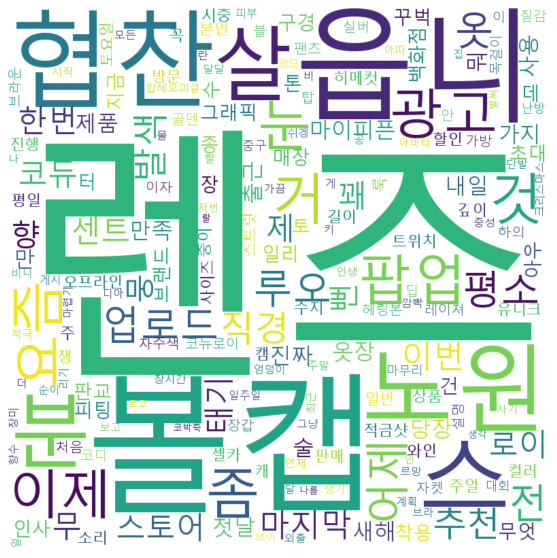

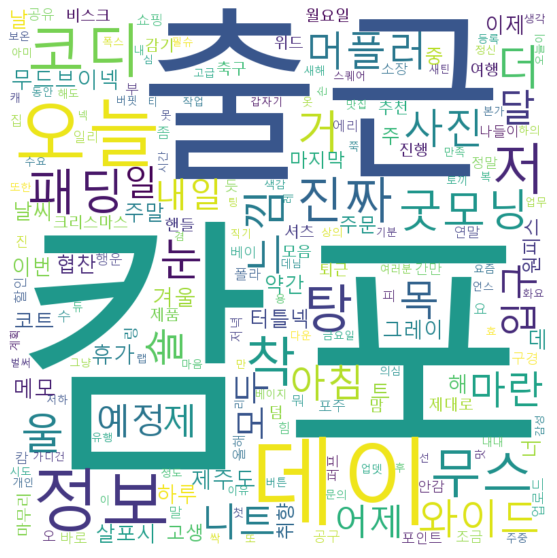

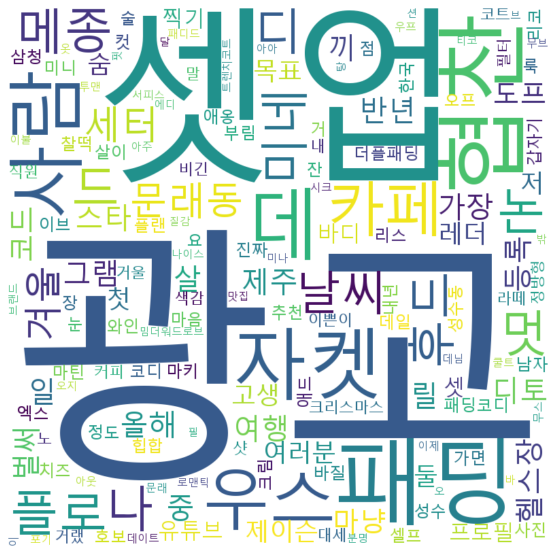

In [6]:
# 인플루언서의 text에 대한 워드 클라우드

from wordcloud import WordCloud
import matplotlib.pyplot as plt

# 임의의 3명의 인플루언서의 text에 대한 워드 클라우드 
for i in [0,25,50]:
    c = text_counter[i]
    wc = WordCloud(font_path ="C:/Windows/Fonts/malgun.ttf", width=400, height=400, scale=2.0, max_font_size=250,background_color='white')
    gen = wc.generate_from_frequencies(c)
    plt.figure(figsize=(10,10))                                 #액자사이즈설정
    plt.axis('off')                                             #테두리 선 없애기
    plt.imshow(gen,interpolation="bilinear")

# 

## **3. 상품정보에 따라 상품을 홍보 및 런칭할 패션 인플루언서 추천**

### 3-1. 특정 상품의 tag 데이터와 인플루언서들의 text 데이터 간 유사도 측정 

In [7]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity


# 특정 상품 선택
product_info = products['tag_literal'][0]

# 전체 인플루언서의 text를 합친 리스트
texts = influencer_info['text_nouns'].apply(lambda x: (' ').join(x)).tolist()

# 상품의 tag와 인플루언서 text를 하나의 리스트로 합치기
texts.insert(0, product_info)
                            
#TF-IDF 행렬 계산 및 코사인 유사도 계산
tfidf = TfidfVectorizer(ngram_range=(1,2), max_features=500)
tfidf_vect = tfidf.fit_transform(texts)

# 상품의 tag 하나와 전체 인플루언서의 text 간의 유사도 측정
style_sim = cosine_similarity(tfidf_vect[0], tfidf_vect)

print(style_sim)

[[1.         0.         0.00525327 0.0483326  0.03334518 0.0702803
  0.06385567 0.01586716 0.05553282 0.00979041 0.04546253 0.01240134
  0.         0.08854334 0.00801603 0.22730085 0.0753752  0.009507
  0.0581225  0.05031949 0.10737737 0.02780452 0.04054038 0.00701377
  0.03355516 0.         0.00729441 0.02804925 0.43346786 0.01750493
  0.00980473 0.05512632 0.04789778 0.         0.01253189 0.05210789
  0.03902634 0.         0.04966335 0.03560793 0.09678763 0.06148756
  0.01066178 0.         0.         0.06048333 0.02497302 0.0257393
  0.25496213 0.02340289 0.05580628 0.03837587 0.01145449 0.02321042
  0.01060218 0.         0.06035937 0.01451905 0.16620739 0.0575983
  0.         0.         0.00173194 0.00881835 0.04092333 0.
  0.         0.         0.03413693 0.00709666 0.03787012 0.04563956
  0.         0.         0.00425952 0.02992211 0.01039578 0.04249197
  0.02895797 0.00883689 0.03365463 0.01302637 0.0165578  0.
  0.00308516 0.02402681 0.02629588 0.         0.         0.08600715
 

### 3-2. 유사도가 가장 높은 3명의 인플루언서 찾기 

In [8]:
# 인플루언서 이름 목록
influencer_id = np.array(sorted(influencer_id))

# 내림차순으로 인덱스 정렬
sorted_index = style_sim.argsort()[:,::-1]

# 상품 정보 제외하고 나머지 인덱스 
sorted_index = sorted_index[:,1:].reshape(-1)

# 상품 정보를 제외했으므로 나머지 인덱스에서 -1씩 해주기
get_index = lambda x: x-1
sorted_index = get_index(sorted_index)
influencer_id = np.array(sorted(influencer_id))

# 유사도가 가장 높은 3명의 인플루언서 출력
id_sorted_index = influencer_id[sorted_index] 
print(id_sorted_index[:3])

['@d_soms' '@jung_staas' '@antmousbe9']


### 3-3. 상품과 인플루언서 간 코사인 유사도 측정 함수 

In [9]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity


# 상품의 tag와 인플루언서들의 text 간 코사인 유사도 계산
def get_similarity(p_image_file):
    product_info = products.loc[p_image_file,'tag_literal']
    
    #전체 인플루언서의 text를 합친 리스트
    texts = influencer_info['text_nouns'].apply(lambda x: (' ').join(x)).tolist()

    #상품의 tag와 인플루언서 text를 하나의 리스트로 합치기
    texts.insert(0, product_info)
    
    #TF-IDF 행렬 계산 및 코사인 유사도 계산
    tfidf = TfidfVectorizer(ngram_range=(1,2), max_features=500)
    tfidf_vect = tfidf.fit_transform(texts)
    
    #코사인 유사도 계산
    style_sim = cosine_similarity(tfidf_vect[0], tfidf_vect)
    
    return style_sim



# 코사인 유사도값을 바탕으로 인플루언서 추천
def get_recommendation(p_image_file):
    style_sim = get_similarity(p_image_file)
    
    #유사도에 대해 내림차순으로 인덱스 재정렬
    sorted_index = style_sim.argsort()[:,::-1]
    
    #상품 정보 제외하고 나머지 인덱스 정렬
    sorted_index = sorted_index[:,1:].reshape(-1)
    
    #상품 정보를 제외했으므로 나머지 인덱스에서 -1씩 해주기
    get_index = lambda x: x-1
    sorted_index = get_index(sorted_index)
    
    #상품과 유사도가 가장 높은 인플루언서 3명의 ID 구하기
    global influencer_id
    influencer_id = np.array(sorted(influencer_id))

    id_sorted_index = influencer_id[sorted_index] 
    
    return id_sorted_index[:3]
    

In [10]:
# 최종 output
# 특정상품의 이미지 파일 입력 시 해당 상품에 대한 인플루언서 추천
# 상품의 코디 컨셉 함께 출력 

p_image_file = 'detail_30059_1_500.jpg'
print('해당 상품의 코디 컨셉::', products.loc[p_image_file, 'look_name'])
print('*********************************************************************')
print('상품을 홍보할 인플루언서 추천::', get_recommendation(p_image_file))

해당 상품의 코디 컨셉:: 확실한 포인트
*********************************************************************
상품을 홍보할 인플루언서 추천:: ['@d_soms' '@jung_staas' '@antmousbe9']


# 

# 

## **4. '무신사 스탠다드' 상품정보에 따른 인플루언서 추천**

#### '무신사' 사이트의 '무신사 스탠다드' 브랜드의 상품 정보를 크롤링 후, 
#### 샘플 데이터와 동일한 방법으로 코사인 유사도 계산 후 특정 상품명 검색시 그에 대한 인플루언서 추천하기 

### 4-1. 크롤링한 데이터 불러오기

In [13]:
# 크롤링한 무신사 스탠다드 상품 데이터 불러오기

musinsa = pd.read_csv("C:/Users/jhr03/OneDrive/바탕 화면/2023 해커톤/무신사tags.csv")
musinsa = pd.DataFrame(musinsa)
musinsa = musinsa.drop(musinsa.columns[0], axis=1)
musinsa.set_index('상품명', inplace=True)

musinsa.rename(columns={'tags':'tag'}, inplace=True)
musinsa.head()


,url,tag
상품명,,
[힛탠다드 이벤트] 힛탠다드 맨즈 크루 넥 티셔츠 [블랙]...,https://www.musinsa.com/app/goods/1639756,"['#동내의', '#내복', '#이너웨어', '#기능성', '#발열', '#기모',..."
사피아노 신세틱 레더 벨트,https://www.musinsa.com/app/goods/1220731,"['#가죽', '#수트', '#인조가죽', '#정장', '#클래식', '#페이크레더..."
[유아인 착용 상품] 테이퍼드 히든 밴딩 크롭 슬랙스 [블...,https://www.musinsa.com/app/goods/1149328,"['#정장바지', '#퍼펙트슬랙스', '#정장팬츠', '#허리밴딩', '#셋업', ..."
[힛탠다드 이벤트] 힛탠다드 맨즈 타이즈 [블랙],https://www.musinsa.com/app/goods/1639235,"['#동내의', '#내복', '#이너웨어', '#기능성', '#발열', '#기모',..."
[유아인 착용 상품] 세미 와이드 히든 밴딩 슬랙스 [블랙...,https://www.musinsa.com/app/goods/1149329,"['#루즈핏', '#셋업팬츠', '#와이드핏', '#정장바지', '#퍼펙트슬랙스',..."


### 4-2. 데이터 전처리

In [14]:
# tag에서 특수문자 제거 후 문장으로 변환

for i in range(len(musinsa)):
    m_tag = musinsa['tag'][i][1:-1].split(',')
    m_tag = list(map(lambda x: x.strip(" ''#"), m_tag))
    musinsa['tag'][i] = m_tag
    
musinsa['tag_literal'] = musinsa['tag'].apply(lambda x: (' ').join(x))
musinsa.head()

,url,tag,tag_literal
상품명,,,
[힛탠다드 이벤트] 힛탠다드 맨즈 크루 넥 티셔츠 [블랙]...,https://www.musinsa.com/app/goods/1639756,"[동내의, 내복, 이너웨어, 기능성, 발열, 기모, 히트, 언더웨어, 힛탠다드]",동내의 내복 이너웨어 기능성 발열 기모 히트 언더웨어 힛탠다드
사피아노 신세틱 레더 벨트,https://www.musinsa.com/app/goods/1220731,"[가죽, 수트, 인조가죽, 정장, 클래식, 페이크레더, 레더컬렉션]",가죽 수트 인조가죽 정장 클래식 페이크레더 레더컬렉션
[유아인 착용 상품] 테이퍼드 히든 밴딩 크롭 슬랙스 [블...,https://www.musinsa.com/app/goods/1149328,"[정장바지, 퍼펙트슬랙스, 정장팬츠, 허리밴딩, 셋업, 유아인착장상품, 무탠픽업]",정장바지 퍼펙트슬랙스 정장팬츠 허리밴딩 셋업 유아인착장상품 무탠픽업
[힛탠다드 이벤트] 힛탠다드 맨즈 타이즈 [블랙],https://www.musinsa.com/app/goods/1639235,"[동내의, 내복, 이너웨어, 기능성, 발열, 기모, 히트, 언더웨어, 힛탠다드, 무...",동내의 내복 이너웨어 기능성 발열 기모 히트 언더웨어 힛탠다드 무탠픽업
[유아인 착용 상품] 세미 와이드 히든 밴딩 슬랙스 [블랙...,https://www.musinsa.com/app/goods/1149329,"[루즈핏, 셋업팬츠, 와이드핏, 정장바지, 퍼펙트슬랙스, 와이드, 유아인착장상품, ...",루즈핏 셋업팬츠 와이드핏 정장바지 퍼펙트슬랙스 와이드 유아인착장상품 무탠픽업


### 4-3. 상품 정보에 따른 인플루언서 추천

In [15]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity


# 상품의 tag와 인플루언서들의 text 간 코사인 유사도 계산
def get_similarity(product_name):
    
    product_info = musinsa.loc[product_name,'tag_literal']
    
    # 전체 인플루언서 text를 합친 리스트
    texts = influencer_info['text_nouns'].apply(lambda x: (' ').join(x)).tolist()

    # 상품의 tag와 인플루언서 text를 하나의 리스트로 합치기
    texts.insert(0, product_info)
    
    #TF-IDF 행렬 계산 및 코사인 유사도 계산
    tfidf = TfidfVectorizer(ngram_range=(1,2), max_features=500)
    tfidf_vect = tfidf.fit_transform(texts)
    
    #코사인 유사도 계산
    style_sim = cosine_similarity(tfidf_vect[0], tfidf_vect)
    
    return style_sim



# 코사인 유사도값을 바탕으로 인플루언서 추천
def get_recommendation(p_image_file):
    style_sim = get_similarity(p_image_file)
    
    #유사도에 대해 내림차순으로 인덱스 재정렬
    sorted_index = style_sim.argsort()[:,::-1]
    
    #상품 정보 제외하고 나머지 인덱스 정렬
    sorted_index = sorted_index[:,1:].reshape(-1)
    
    #상품 정보를 제외했으므로 나머지 인덱스에서 -1씩 해주기
    get_index = lambda x: x-1
    sorted_index = get_index(sorted_index)
    
    #상품과 유사도가 가장 높은 인플루언서 3명의 ID 구하기
    global influencer_id
    influencer_id = np.array(sorted(influencer_id))

    id_sorted_index = influencer_id[sorted_index] 
    
    return id_sorted_index[:3]


In [16]:
# 최종 output
# 특정 상품명 입력 시 해당 상품에 대한 인플루언서 추천

product_name = '사피아노 신세틱 레더 벨트'
print(f'{product_name}을 홍보할 인플루언서 추천::', get_recommendation(product_name))

사피아노 신세틱 레더 벨트을 홍보할 인플루언서 추천:: ['@jin_pyo_is' '@siaestival' '@odor_bubu']
